In [1]:
!pip install pandas
!pip install spacy
!pip install pandas numpy matplotlib seaborn
!pip install nltk
!pip install gensim
!pip install wordcloud
!pip install scikit-learn
!pip install textblob

In [2]:
import pandas as pd
import csv

df = pd.read_csv("cleaned_reddit_opinion3.csv")

df.head()

/Users/kc/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,cleaned_text,Lemma,post_title,subreddit,post_score,post_upvote_ratio,post_thumbs_ups
0,Their voices are absolutely beautiful,voice absolutely beautiful,My Hometown GAZA !,Palestine,104,0.98,104
1,I was naming the historical reasons neither eg...,name historical reason neither egypt jordan ...,Why is it so uniquely bad for Palestinians to ...,IsraelPalestine,61,0.75,61
2,Ya got brainwashed pardner,Ya get brainwash pardner,Psychological Warfare,IsraelPalestine,15,0.75,15
3,Are palestinians still living in jordan and eg...,palestinian still live jordan egypt yes egyp...,Why is it so uniquely bad for Palestinians to ...,IsraelPalestine,61,0.75,61
4,The excuse that the palestinians have a valid ...,excuse palestinian valid grievance attack ex...,Thoughts on a refined Clinton Proposal? How wo...,IsraelPalestine,2,0.75,2


In [3]:
!pip install textstat
import textstat

df['readability'] = df['cleaned_text'].apply(lambda x: textstat.flesch_reading_ease(str(x)))

In [4]:
df[['cleaned_text', 'readability']].head()



,cleaned_text,readability
0,Their voices are absolutely beautiful,15.64
1,I was naming the historical reasons neither eg...,30.20
2,Ya got brainwashed pardner,75.88
3,Are palestinians still living in jordan and eg...,40.69
4,The excuse that the palestinians have a valid ...,35.62


In [5]:
print(df['readability'].describe())


count    2.369534e+06
mean     3.681847e+01
std      7.347620e+01
min     -6.900590e+03
25%      2.207000e+01
50%      5.050000e+01
75%      7.419000e+01
max      2.058200e+02
Name: readability, dtype: float64


/Users/kc/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


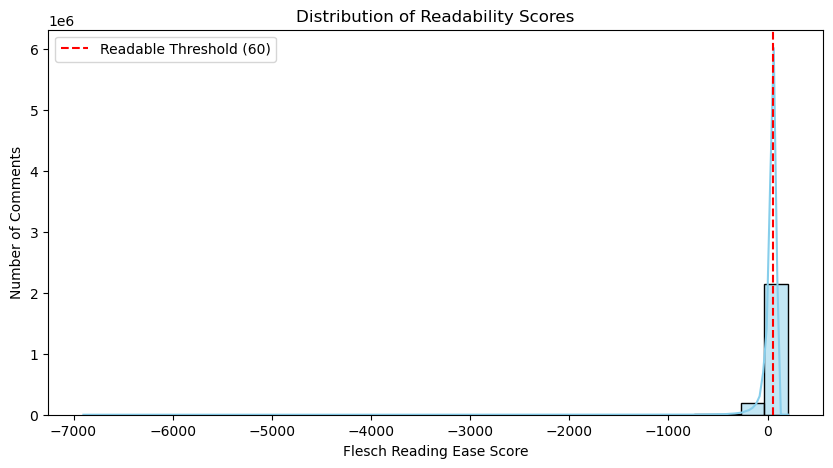

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df['readability'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Readability Scores')
plt.xlabel('Flesch Reading Ease Score')
plt.ylabel('Number of Comments')
plt.axvline(x=60, color='red', linestyle='--', label='Readable Threshold (60)')
plt.legend()
plt.show()


/Users/kc/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


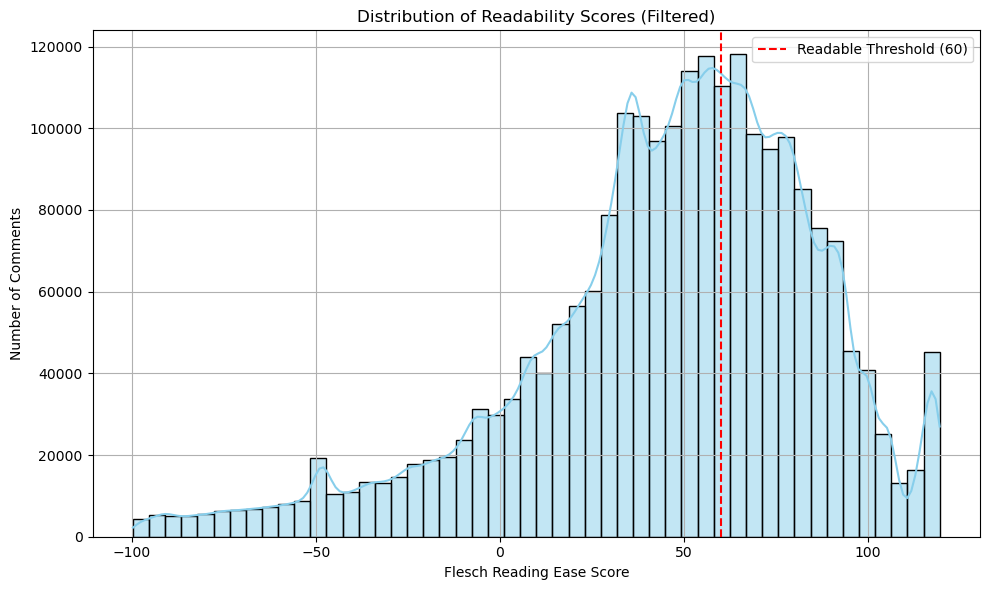

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop extreme outliers for visualization
filtered = df[df['readability'].between(-100, 120)]

plt.figure(figsize=(10, 6))
sns.histplot(filtered['readability'], bins=50, color='skyblue', kde=True)
plt.axvline(x=60, color='red', linestyle='--', label='Readable Threshold (60)')
plt.title('Distribution of Readability Scores (Filtered)')
plt.xlabel('Flesch Reading Ease Score')
plt.ylabel('Number of Comments')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


In [8]:
print(df['comment_length'].describe())


KeyError: 'comment_length'